In [21]:
## Continue Data Processing ##

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
df = pd.read_csv('C:/Final_project/Final_project/analysis_file/cleaned_data.csv', index_col=0)

In [24]:
df.shape

(1359, 12)

In [25]:
df['quality'] = df['quality'].map({'Non-Quality': 0, 'Quality': 1, })

In [26]:
df['quality'].unique()

array([0, 1], dtype=int64)

In [27]:
df['quality'].value_counts()

quality
1    719
0    640
Name: count, dtype: int64

In [28]:
df.rename(columns = {'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity',
                    'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar',
                    'chlorides': 'chlorides', 'free sulfur dioxide': 'free_sulfur_dioxide',
                    'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace = True)

In [29]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


Burada bağımlı değişkenimiz "quality" yi, bağımsız değişkenlerimiz olarak diğer sutünları alıyoruz. Bu kimyasal değişkenlerin hepsi şarabın içinde olmak zorunda olduğu için ilk etapta herhangi bir features çıkarmadım. Quality yi kaliteli-kalitesiz olarak ayırdığımız için  durum üzerinden sınıflandırma yapmamız daha uygun. 

Bu modelleri uygulayıp hangisinin iyi sonuç verdiğine baktım.
Logistic Regression (Lojistik Regresyon):
- Basit ve yeterince hızlıdır.
- Veri setinde doğrusal bir sınıflandırma problemi varsa ve featureslar arasındaki ilişkilerin doğrusal olduğunu       düşünüyorsak kullanışlıdır.

Support Vector Classifier (Destek Vektör Sınıflandırıcısı - SVC):
- Veri setinde karmaşık sınırlar varsa  veya yüksek boyutlu özellik uzayları varsa.
- SVM modelleri genellikle iyi genelleme yapar.

Random Forest (Rastgele Orman):
- Çeşitli özellik türleri ve yüksek boyutlu veri setleri için güçlüdür.
- Overfitting'e karşı dayanıklıdır ve otomatik olarak özellik önemini değerlendirir.
K-Nearest Neighbors (KNN):
- Veri setiniz küçük ve sınıflar birbirine yakınsa kullanışlıdır.
- Ancak boyutluluk sorunu nedeniyle yüksek boyutlu veri setlerinde performans sorunları ortaya çıkabilir.

Decision Trees (Karar Ağaçları):
- Basit ve yorumlanabilir bir model arıyorsanız kullanışlıdır.
- Ancak tek başına eğilimli olduğu overfitting sorunuyla başa çıkmak için ensemble yöntemleriyle (örneğin, Random Forest) birleştirilebilir.

In [30]:
X = df.drop(['quality'], axis=1)  # bağımsız değişkenler 
y = df['quality']                 # bağımlı(hedef) değişken

# Modelin başarısını arttırmak ve aşırı etkisi olan verilerin etkisini azaltmak için verilerimizi normalize etmeliyiz.

In [31]:
# Normalize the data
X = preprocessing.StandardScaler().fit(X).transform(X)

# Veri setimizi train ve test olarak bölüyoruz.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1087, 11) (1087,)
Test set: (272, 11) (272,)


# Models

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)

# Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Decision Trees
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Modelllerin karşılaştırılması ve değerlendirme metrikleri uygulanması
models = [logreg_model, svc_model, rf_model, knn_model, dt_model]
predictions = [logreg_predictions, svc_predictions, rf_predictions, knn_predictions, dt_predictions]
model_names = ['Logistic Regression', 'SVC', 'Random Forest', 'KNN', 'Decision Trees']

for model, preds, name in zip(models, predictions, model_names):
    accuracy = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds)
    matrix = confusion_matrix(y_test, preds)
    
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", matrix)
    print("\n")

Results for Logistic Regression:
Accuracy: 0.7647
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75       124
           1       0.80      0.75      0.78       148

    accuracy                           0.76       272
   macro avg       0.76      0.77      0.76       272
weighted avg       0.77      0.76      0.77       272

Confusion Matrix:
 [[ 97  27]
 [ 37 111]]


Results for SVC:
Accuracy: 0.7831
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.77       124
           1       0.82      0.76      0.79       148

    accuracy                           0.78       272
   macro avg       0.78      0.78      0.78       272
weighted avg       0.79      0.78      0.78       272

Confusion Matrix:
 [[100  24]
 [ 35 113]]


Results for Random Forest:
Accuracy: 0.7426
Classification Report:
               precision    recall  f1-score   support

   

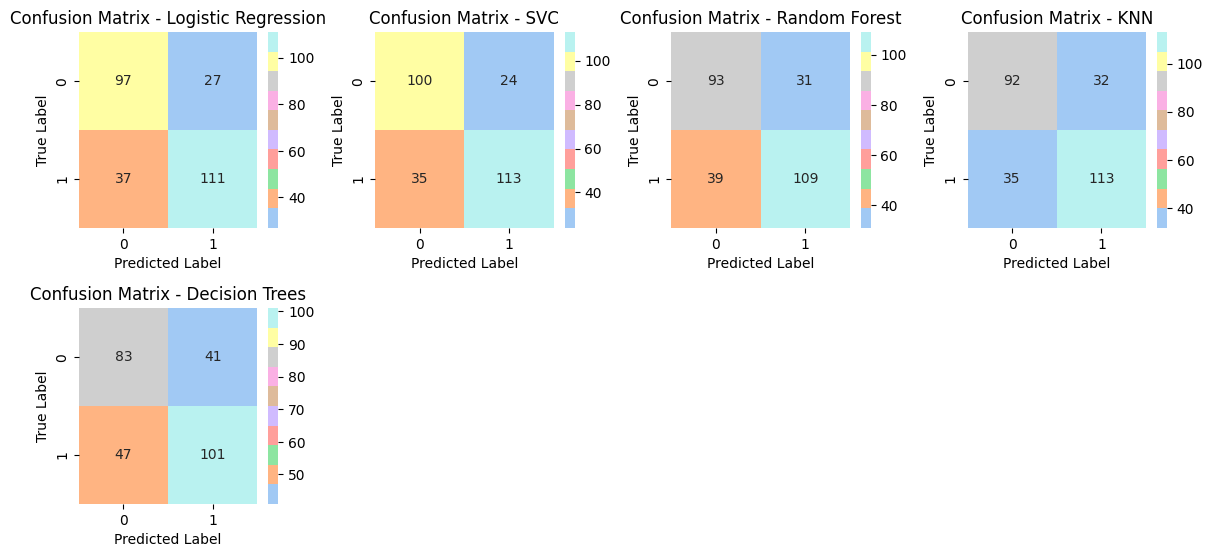

In [34]:
pastel_cmap = sns.color_palette("pastel", as_cmap=True)
confusion_matrices = []

# (model eğitimi ve tahminleri)

for preds, name in zip(predictions, model_names):
    matrix = confusion_matrix(y_test, preds)
    confusion_matrices.append((name, matrix))

# Her model için karışıklık matrisi ısı haritalarını çizelim
plt.figure(figsize=(12, 8))
for i, (model_name, cm) in enumerate(confusion_matrices, 1):
    plt.subplot(3, 4, i)
    plt.title(f'Confusion Matrix - {model_name}')
    sns.heatmap(cm, annot=True, fmt='d', cmap=pastel_cmap )
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()

En başarılı model Support Vector Classifier çıktı.

Confusion matrixe baktığımızda model gerçek veri üzerinden 124 tane kalitesiz şarabın  100 tanesini kalitesiz yani doğru tahmin etmiş. 148 tane kaliteli sınıfından da 113 tanesini kaliteli yani  doğru tahmin etmiş. Accuracy değeri de diğer modellerden daha yüksek.

Şimdi de sadece quality değişkeni üzerinde en fazla pozitif etkiye sahip olduğunu düşündüğümüz alcohol değişkeniyle kalite arasında model oluşturuyoruz ve sonuçtan da elde ettiğimiz üzere SVC modelin başarısı düşsede yine de en başarılı model SVC oluyor.
- Genel olarak diğer modellerinde başarısı düşmüş.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

x = df['alcohol'].values.reshape(-1, 1)
y = df['quality'].values

# Veriyi train ve test setlere ayıralım
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Logistic Regression modelini oluşturalım
logreg_model_alcohol = LogisticRegression()
logreg_model_alcohol.fit(X_train, y_train)
alcohol_predictions = logreg_model_alcohol.predict(X_test)
# Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Decision Trees
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Modelllerin karşılaştırılması ve değerlendirme metrikleri uygulanması
models = [logreg_model, svc_model, rf_model, knn_model, dt_model]
predictions = [logreg_predictions, svc_predictions, rf_predictions, knn_predictions, dt_predictions]
model_names = ['Logistic Regression', 'SVC', 'Random Forest', 'KNN', 'Decision Trees']

for model, preds, name in zip(models, predictions, model_names):
    accuracy = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds)
    matrix = confusion_matrix(y_test, preds)
    
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", matrix)
    print("\n")



Results for Logistic Regression:
Accuracy: 0.4963
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.49      0.49       135
           1       0.50      0.50      0.50       137

    accuracy                           0.50       272
   macro avg       0.50      0.50      0.50       272
weighted avg       0.50      0.50      0.50       272

Confusion Matrix:
 [[66 69]
 [68 69]]


Results for SVC:
Accuracy: 0.7059
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.66      0.69       135
           1       0.69      0.75      0.72       137

    accuracy                           0.71       272
   macro avg       0.71      0.71      0.71       272
weighted avg       0.71      0.71      0.71       272

Confusion Matrix:
 [[ 89  46]
 [ 34 103]]


Results for Random Forest:
Accuracy: 0.6801
Classification Report:
               precision    recall  f1-score   support

       